# Gramener Case Study

## Basic Preparatory Steps

### Calling Libraries

In [810]:
import pandas as pd
import numpy as np
import os as os
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.stats import kurtosis
from scipy.stats import skew
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from dateutil.relativedelta import relativedelta

### Importing Data

In [811]:
os.chdir('C:/Users/ssen1005/Desktop/PGDML/107/loan')
loan_data = pd.read_csv('loan.csv', dtype='unicode')
df = loan_data

In [812]:
# print(df.head())
# print(df.dtypes)
print(df.columns)
print(df.shape)

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       ...
       u'num_tl_90g_dpd_24m', u'num_tl_op_past_12m', u'pct_tl_nvr_dlq',
       u'percent_bc_gt_75', u'pub_rec_bankruptcies', u'tax_liens',
       u'tot_hi_cred_lim', u'total_bal_ex_mort', u'total_bc_limit',
       u'total_il_high_credit_limit'],
      dtype='object', length=111)
(39717, 111)


### Identifying Variable Data type

In [813]:
cont_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti',
'revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']

cat_cols = ['id','member_id','term','grade','sub_grade','emp_title','emp_length','home_ownership',
'verification_status','loan_status','pymnt_plan','url','desc','purpose','title','zip_code','addr_state',
'delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','total_acc',
'initial_list_status','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type',
'annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal',
'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths',
'avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc',
'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd',
'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts',
'num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
'pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort',
'total_bc_limit','total_il_high_credit_limit']

date_cols = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
other_cols = ['revol_util','int_rate']

### Defining Actual Variable Data type

In [814]:
for col1 in cat_cols:
    df[col1] = df[col1].astype('object',copy=False)

for col2 in cont_cols:
    df[col2] = pd.to_numeric(df[col2], errors='coerce')

df['int_rate'] = df['int_rate'].astype(str).str[:-1].astype(float)    
df['revol_util'] = df['revol_util'].str[:-1].astype(float)    

df['earliest_cr_line']= df['earliest_cr_line'].apply(lambda x: pd.datetime.strptime(str(x), '%b-%y').strftime('%m-%Y'))
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

df['issue_d']=df['issue_d'].apply(lambda x: pd.datetime.strptime(x, '%b-%y').strftime('%m-%Y'))
df['issue_d'] = pd.to_datetime(df['issue_d'])

# df.to_csv('loan_df.csv', index=False)


# for col3 in date_cols:
#     df[col3] = df[col3].fillna(np.NaN,inplace = True)
# df[col3] = df[col3].apply(parse)


## Data Exploration - Extended Data Dictionary

In [815]:
df.drop_duplicates()

col_name=df.columns

cont=pd.DataFrame()
categ=pd.DataFrame()

for name in col_name:
    empty=pd.DataFrame()
    if (is_numeric_dtype(df[name])):
           
            obs=df[name].count()
            nmiss=df[name].isnull().sum()
            unique=df[name].nunique()
            mean=df[name].mean()
            std_dev=df[name].std()
            median=df[name].median()
            mode='-'
            min=df[name].min()
            max=df[name].max()
            p1=df[name].quantile(0.01)
            p5=df[name].quantile(0.05)
            p25=df[name].quantile(0.25)
            p75=df[name].quantile(0.75)
            p95=df[name].quantile(0.95)
            p99=df[name].quantile(0.99)
            skewness = skew(df[name])
#             kurtosis ='-'
#             data=[[name,obs,nmiss,unique,mean,std_dev,median,mode,min,max,p1,p5,p25,p75,p95,p99,skewness,kurtosis]]
            data=[[name,obs,nmiss,unique,mean,std_dev,median,mode,min,max,p1,p5,p25,p75,p95,p99,skewness]]
#             empty=pd.DataFrame(data,columns=    ['name','obs','nmiss','unique','mean','std_dev','median','mode','min','max','p1','p5','p25','p75','p95','p99','skewness','kurtosis'])
            empty=pd.DataFrame(data,columns=    ['name','obs','nmiss','unique','mean','std_dev','median','mode','min','max','p1','p5','p25','p75','p95','p99','skewness'])
    cont=cont.append(empty)
    
for name in col_name:
    empty=pd.DataFrame()  
    if (is_string_dtype(df[name])):
           
            obs=df[name].count()
            nmiss=df[name].isnull().sum()
            unique=df[name].nunique()
            mean='-'
            std_dev='-'
            median='-'
            mode=df[name].mode()
            min='-'
            max='-'
            p1='-'
            p5='-'
            p25='-'
            p75='-'
            p95='-'
            p99='-'
            skewness ='-'
#             kurtosis ='-'
#             data=[[name,obs,nmiss,unique,mean,std_dev,median,mode,min,max,p1,p5,p25,p75,p95,p99,skewness,kurtosis]]
            data=[[name,obs,nmiss,unique,mean,std_dev,median,mode,min,max,p1,p5,p25,p75,p95,p99,skewness]]
#             empty=pd.DataFrame(data,columns=    ['name','obs','nmiss','unique','mean','std_dev','median','mode','min','max','p1','p5','p25','p75','p95','p99','skewness','kurtosis'])
            empty=pd.DataFrame(data,columns=    ['name','obs','nmiss','unique','mean','std_dev','median','mode','min','max','p1','p5','p25','p75','p95','p99','skewness'])
    categ=categ.append(empty)
    
pd.concat([cont,categ]).reset_index(drop=True)    
# edd_out = pd.concat([cont,categ]).reset_index(drop=True)
# edd_out.to_csv("edd.csv", index=False)

,name,obs,nmiss,unique,mean,std_dev,median,mode,min,max,p1,p5,p25,p75,p95,p99,skewness
0,loan_amnt,39717,0,885,11219.4,7456.67,10000,-,500,35000,1200,2400,5500,15000,25000,35000,1.05928
1,funded_amnt,39717,0,1041,10947.7,7187.24,9600,-,500,35000,1200,2400,5400,15000,25000,35000,1.08167
2,funded_amnt_inv,39717,0,8205,10397.4,7128.45,8975,-,0,35000,675.001,1873.66,5000,14400,24736.6,34750,1.10617
3,int_rate,39717,0,371,12.0212,3.72483,11.86,-,5.42,24.59,5.42,6.17,9.25,14.59,18.54,20.99,0.293718
4,installment,39717,0,15383,324.562,208.875,280.22,-,15.69,1305.19,37.61,71.246,167.02,430.78,762.996,931.542,1.12838
5,annual_inc,39717,0,5318,68968.9,63793.8,59000,-,4000,6e+06,14400,24000,40404,82300,142000,234999,30.948
6,dti,39717,0,2868,13.3151,6.67859,13.4,-,0,29.99,0.35,2.13,8.17,18.6,23.84,26.68,-0.0280423
7,revol_bal,39717,0,21711,13382.5,15885,8850,-,0,149588,0,321.8,3703,17058,41656.4,83101.9,3.19076
8,revol_util,39667,50,1089,48.8322,28.3326,49.3,-,0,99.9,0,2.7,25.4,72.4,93.5,98.5,NaN
9,out_prncp,39717,0,1137,51.2279,375.173,0,-,0,6311.47,0,0,0,0,0,2095.53,9.22638


## Data Cleaning

### Variable Classification

In [817]:
#Variables with complete missing data

cols_all_na = ['acc_open_past_24mths','all_util','annual_inc_joint','avg_cur_bal','bc_open_to_buy','bc_util',
'dti_joint','fico_range_high','fico_range_low','il_util','inq_fi','inq_last_12m','last_fico_range_high','last_fico_range_low',
'max_bal_bc','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
'mort_acc','mths_since_last_major_derog','mths_since_rcnt_il','mths_since_recent_bc','mths_since_recent_bc_dlq',
'mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl',
'num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m',
'num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','open_acc_6m','open_il_12m','open_il_24m','open_il_6m',
'open_rv_12m','open_rv_24m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_coll_amt','tot_cur_bal','tot_hi_cred_lim',
'total_bal_ex_mort','total_bal_il','total_bc_limit','total_cu_tl','total_il_high_credit_limit','total_rev_hi_lim',
'verified_status_joint']

#Variables to ignore

id_cols = ['id','member_id',]
cols_with_desc = ['url','desc','title', 'zip_code', 'emp_title']
cols_with_insig_fill = ['pymnt_plan','initial_list_status','collections_12_mths_ex_med',
'policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens', 
                        'next_pymnt_d','pub_rec_bankruptcies', 'mths_since_last_delinq','mths_since_last_record']

#Variables to consider

cols_consdr = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade',
'sub_grade','emp_length','home_ownership','annual_inc','verification_status','issue_d',
'loan_status','purpose','addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc',
'pub_rec','revol_bal','revol_util','total_acc',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']


#Setting the Threshold to Keep / Drop Rows and Columns
# df_new_c = df.dropna(thresh=math.ceil(len(df.columns)*0.6)) #setting to 60% filled data criteria by columns
# df_new_r = df.dropna(axis=1, thresh = math.ceil(len(df)*0.6)) #setting to 60% filled data criteria by rows
df = df[cols_consdr]

#Categorical Variables

cat_cols = df.select_dtypes(['object']).columns
cont_cols = df.select_dtypes(exclude= ['object']).columns

print(cat_cols)
print(cont_cols)

Index([u'term', u'grade', u'sub_grade', u'emp_length', u'home_ownership',
       u'verification_status', u'loan_status', u'purpose', u'addr_state',
       u'delinq_2yrs', u'inq_last_6mths', u'open_acc', u'pub_rec',
       u'total_acc', u'last_pymnt_d', u'last_credit_pull_d'],
      dtype='object')
Index([u'loan_amnt', u'funded_amnt', u'funded_amnt_inv', u'int_rate',
       u'installment', u'annual_inc', u'issue_d', u'dti', u'earliest_cr_line',
       u'revol_bal', u'revol_util', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'last_pymnt_amnt'],
      dtype='object')


### Missing Value Imputation

In [818]:
#For continuous

median_value=df['revol_util'].median()
df['revol_util']  = df['revol_util'].fillna(median_value)

#For categorical

for col in cat_cols:
    mode_value = df[col].mode()
    df[col] = df[col].fillna(mode_value)


C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Outlier Treatment

In [819]:
#Before Treatment Charts

# for col in cont_cols:
    
#     sns.set(style='whitegrid')
#     sns.distplot(df[col], kde=True, rug=False)
#     plt.show()
#     sns.boxplot(x='loan_status', y= col,data=df, palette='Set3')
#     plt.tight_layout()
#     plt.show()


In [820]:
#For Continuous variables

for col in cont_cols:
    percentiles = df[col].quantile([0.05,0.95]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]    


C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


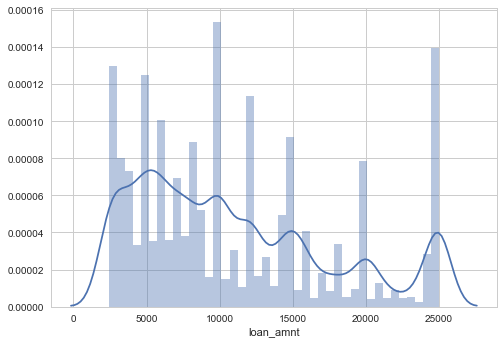

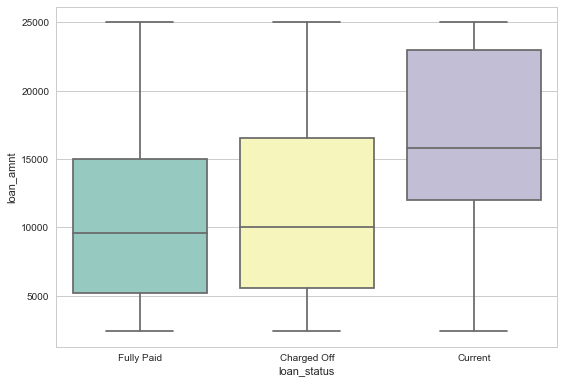

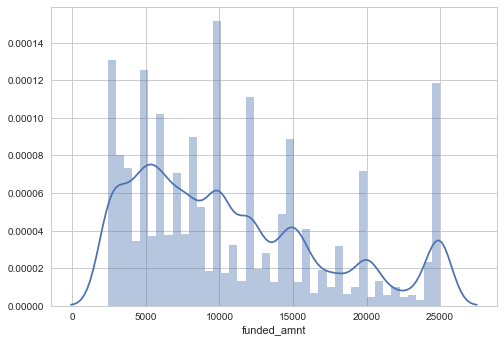

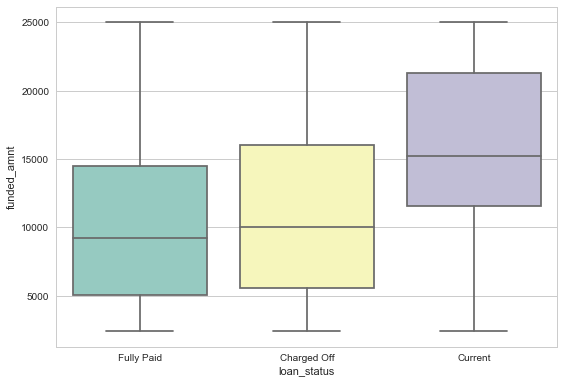

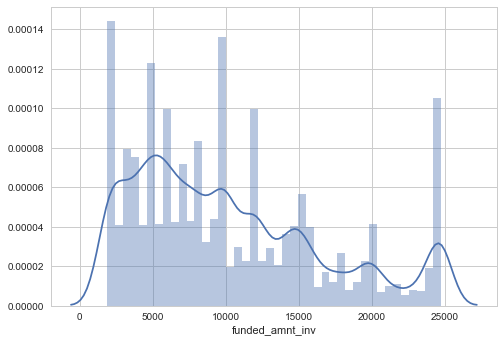

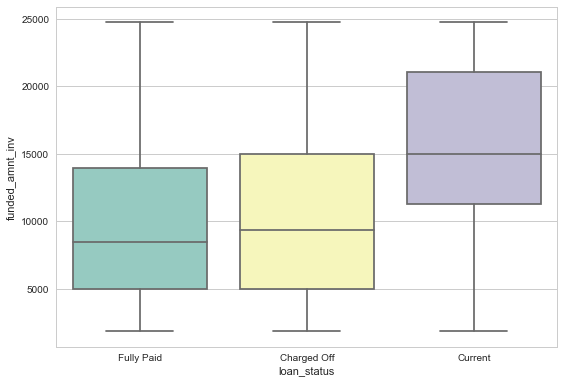

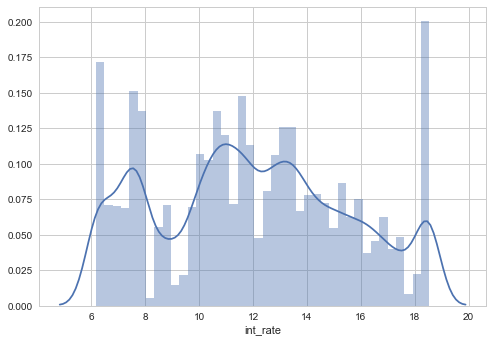

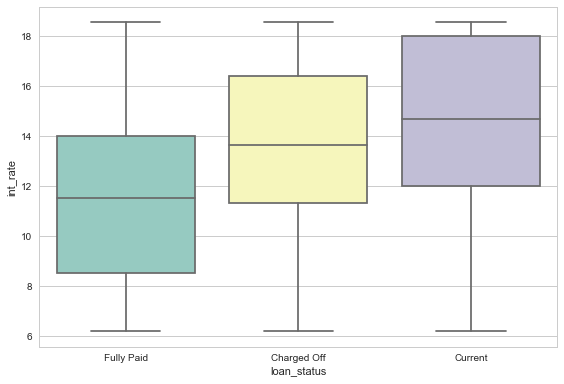

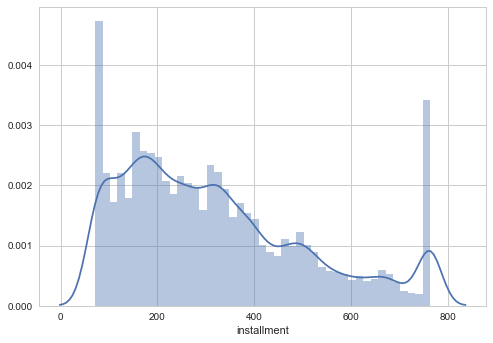

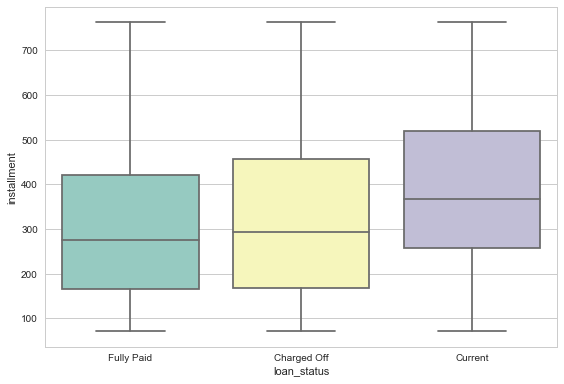

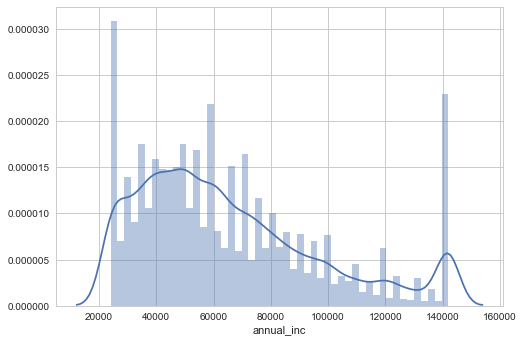

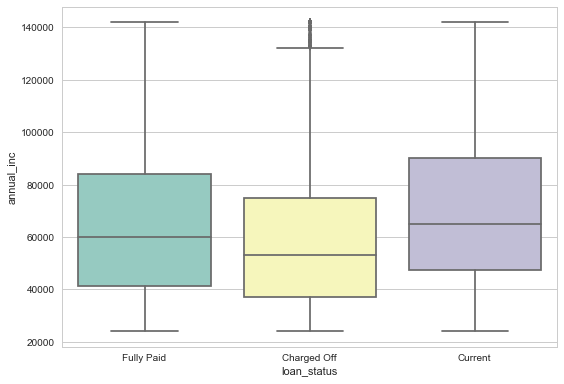

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

In [821]:
#After Treatment charts

for col in cont_cols:
   
    sns.set(style='whitegrid')
    sns.distplot(df[col], kde=True, rug=False)
    plt.show()
    sns.boxplot(x='loan_status', y= col,data=df, palette='Set3')
    plt.tight_layout()
    plt.show()


## Analysis of Continuous Variables

### Correlation Analysis - Overall

In [ ]:
corr = df[cont_cols].corr()

#Plot 1

# def magnify():
#     return [dict(selector="th",
#                  props=[("font-size", "7pt")]),
#             dict(selector="td",
#                  props=[('padding', "0em 0em")]),
#             dict(selector="th:hover",
#                  props=[("font-size", "12pt")]),
#             dict(selector="tr:hover td:hover",
#                  props=[('max-width', '200px'),
#                         ('font-size', '12pt')])
# ]
# corr.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_caption("Hover to magify")\
#     .set_precision(2)\
#     .set_table_styles(magnify())


#Plot 2

plt.figure(figsize=(15, 10))

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()


### Correlation Analysis - Charged Off cases

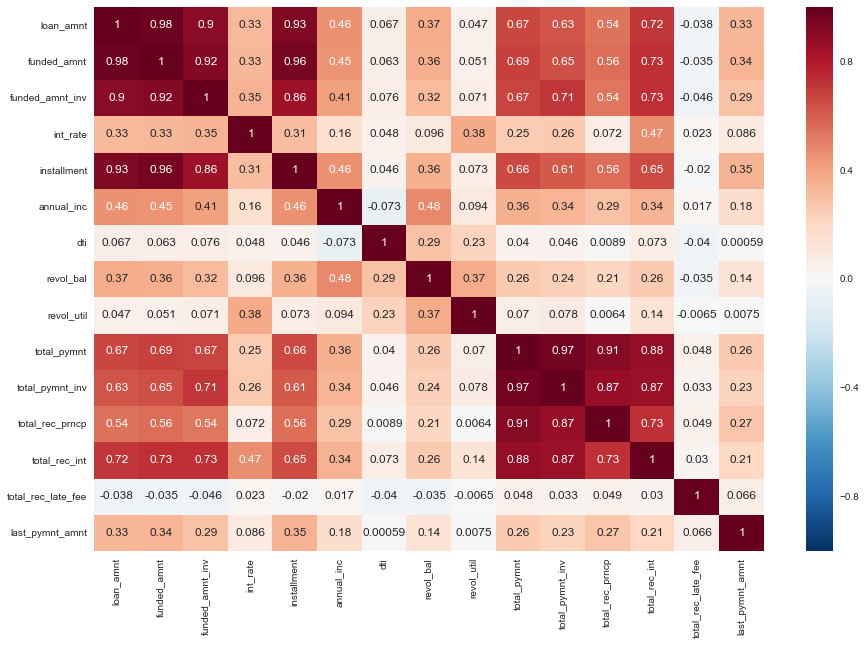

In [823]:
df_charged_off = df[df['loan_status'] == 'Charged Off']

corr = df_charged_off[cont_cols].corr()

plt.figure(figsize=(15, 10))

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

## Analysis of Categorical Variables

### Univariate Analysis

In [824]:
cat_cols = ['total_acc','open_acc', 'inq_last_6mths', 'addr_state', 'purpose',
'loan_status', 'verification_status', 'home_ownership', 'emp_length', 'grade', 'sub_grade', 'term']


#loan_status

cat_col_counts =  df.groupby(['loan_status'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#verification_status

cat_col_counts =  df.groupby(['verification_status'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#home_ownership

cat_col_counts =  df.groupby(['home_ownership'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#emp_length

cat_col_counts =  df.groupby(['emp_length'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#term

cat_col_counts =  df.groupby(['term'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#purpose

cat_col_counts =  df.groupby(['purpose'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#grade

cat_col_counts =  df.groupby(['grade'])['sub_grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#sub_grade

cat_col_counts =  df.groupby(['sub_grade'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#total_acc

cat_col_counts =  df.groupby(['total_acc'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#open_acc

cat_col_counts =  df.groupby(['open_acc'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#inq_last_6mths

cat_col_counts =  df.groupby(['inq_last_6mths'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#addr_state

cat_col_counts =  df.groupby(['addr_state'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

   loan_status  count_of_member_id  cum_sum       cum_%
0   Fully Paid               32950    32950   82.961956
1  Charged Off                5627    38577   97.129693
2      Current                1140    39717  100.000000
  verification_status  count_of_member_id  cum_sum       cum_%
0        Not Verified               16921    16921   42.603923
1            Verified               12809    29730   74.854596
2     Source Verified                9987    39717  100.000000
  home_ownership  count_of_member_id  cum_sum       cum_%
0           RENT               18899    18899   47.584158
1       MORTGAGE               17659    36558   92.046227
2            OWN                3058    39616   99.745701
3          OTHER                  98    39714   99.992447
4           NONE                   3    39717  100.000000
   emp_length  count_of_member_id  cum_sum       cum_%
0   10+ years                8879     8879   22.355666
1    < 1 year                4583    13462   33.894806
2     2 yea

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:39: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:49: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be

### Bivariate Analysis

### Time series trends - Month on Month Variations

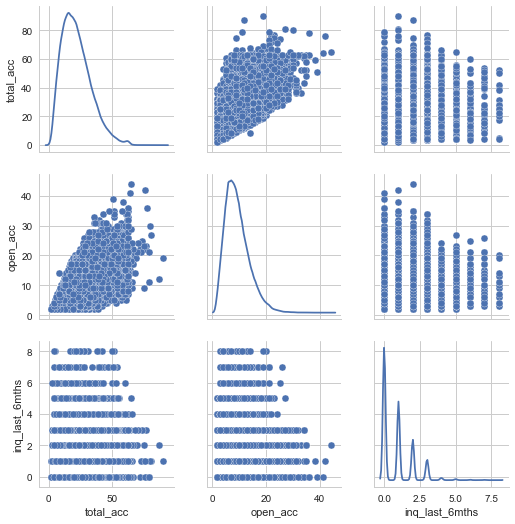

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


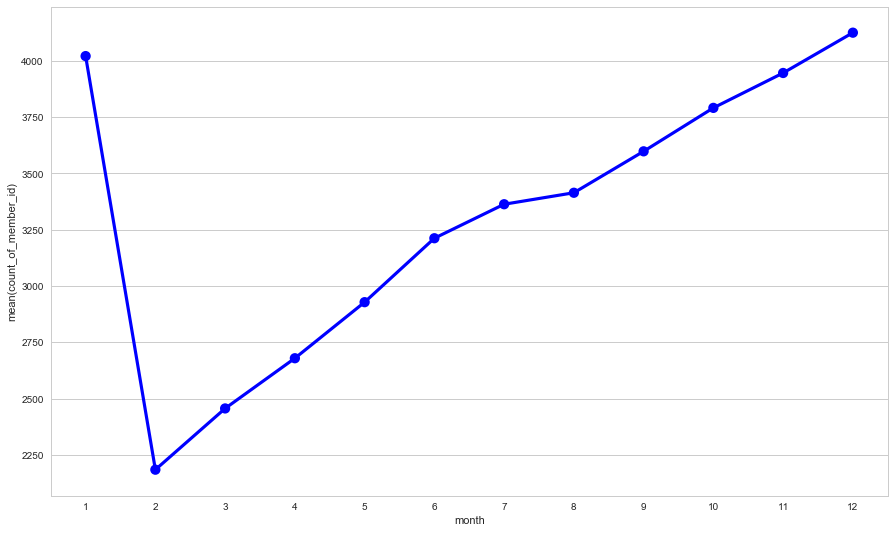

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


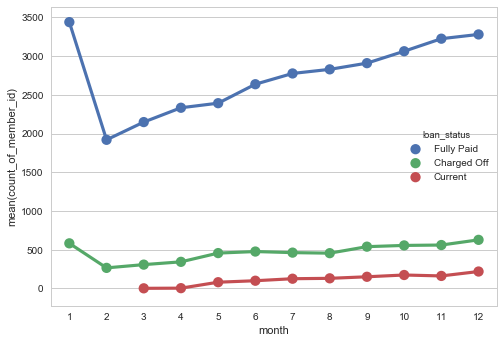

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:51: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


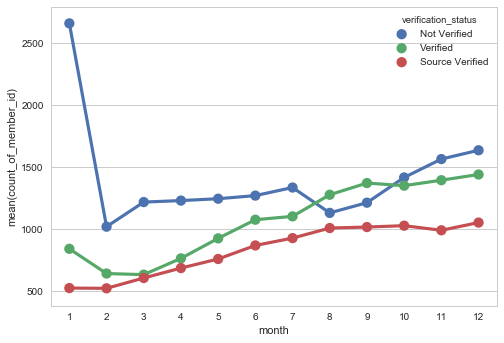

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:66: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


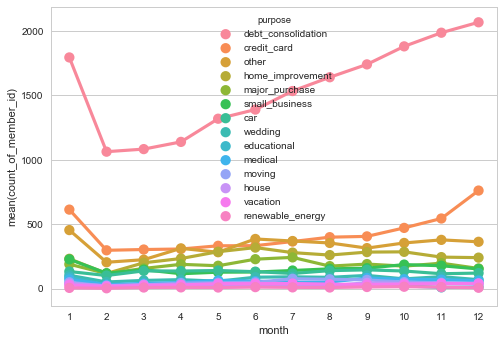

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:80: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


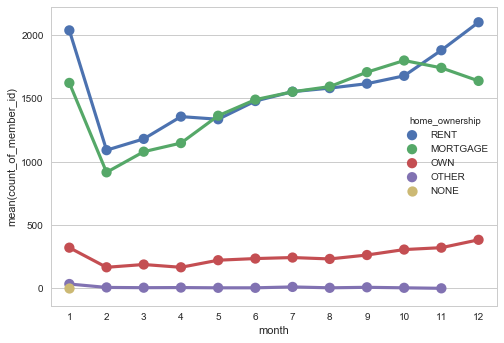

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:94: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


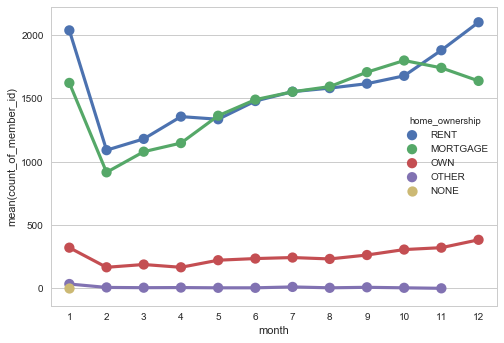

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:109: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


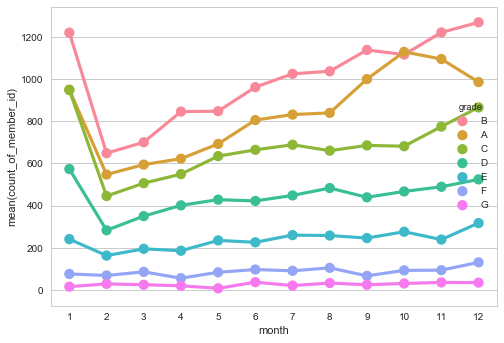

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:124: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


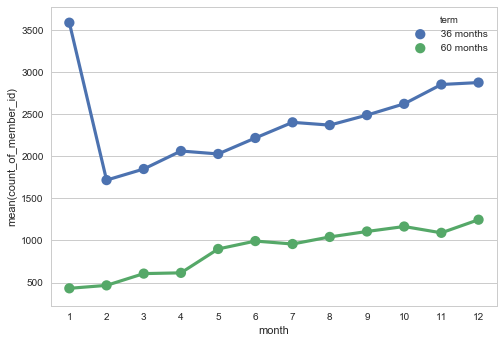

In [825]:
cat_cols = ['total_acc','open_acc', 'inq_last_6mths', 'addr_state', 'purpose',
'loan_status', 'verification_status', 'home_ownership', 'emp_length', 'grade', 'sub_grade', 'term']

# for col in cat_cols:
       
#     sns.jointplot(x='loan_status', y= col,data=df)
#     plt.tight_layout()
#     plt.show()


# Pair Plot

plt.figure(figsize=(14, 14))

sns.pairplot(df[cat_cols], diag_kind='kde')
plt.show()

# Evolution over time - Loan Status vs Time

df['month'] = df['issue_d'].dt.month

month_wise_count = df.groupby('month')['grade'].agg({'count_of_member_id':'count'})
month_wise_count = month_wise_count.sort_values('count_of_member_id', ascending=False)
month_wise_count.columns.name = None
month_wise_count = month_wise_count.reset_index()
month_wise_count

plt.figure(figsize=(15, 9))
sns.pointplot(x = month_wise_count.month, y = month_wise_count.count_of_member_id, color = 'blue', label='count of loans approved')
plt.show()


#loan status

month_wise_var_count = df.groupby(['loan_status','month'])['grade'].agg({'count_of_member_id':'count'})
month_wise_var_count = month_wise_var_count.sort_values('count_of_member_id', ascending=False)
month_wise_var_count.columns.name = None
month_wise_var_count = month_wise_var_count.reset_index()
month_wise_var_count

sns.pointplot(x = month_wise_var_count.month ,
              y = month_wise_var_count.count_of_member_id , 
              hue = month_wise_var_count.loan_status)

plt.show()



#verification status

month_wise_var_count = df.groupby(['verification_status','month'])['grade'].agg({'count_of_member_id':'count'})
month_wise_var_count = month_wise_var_count.sort_values('count_of_member_id', ascending=False)
month_wise_var_count.columns.name = None
month_wise_var_count = month_wise_var_count.reset_index()
month_wise_var_count

sns.pointplot(x = month_wise_var_count.month ,
              y = month_wise_var_count.count_of_member_id , 
              hue = month_wise_var_count.verification_status)

plt.show()

# fig = plt.figure(figsize=(13, 4))
#purpose

month_wise_var_count = df.groupby(['purpose','month'])['grade'].agg({'count_of_member_id':'count'})
month_wise_var_count = month_wise_var_count.sort_values('count_of_member_id', ascending=False)
month_wise_var_count.columns.name = None
month_wise_var_count = month_wise_var_count.reset_index()
month_wise_var_count

sns.pointplot(x = month_wise_var_count.month ,
              y = month_wise_var_count.count_of_member_id , 
              hue = month_wise_var_count.purpose)

plt.show()

#home_ownership

month_wise_var_count = df.groupby(['home_ownership','month'])['grade'].agg({'count_of_member_id':'count'})
month_wise_var_count = month_wise_var_count.sort_values('count_of_member_id', ascending=False)
month_wise_var_count.columns.name = None
month_wise_var_count = month_wise_var_count.reset_index()
month_wise_var_count

sns.pointplot(x = month_wise_var_count.month ,
              y = month_wise_var_count.count_of_member_id , 
              hue = month_wise_var_count.home_ownership)

plt.show()

#emp_length

month_wise_var_count = df.groupby(['home_ownership','month'])['grade'].agg({'count_of_member_id':'count'})
month_wise_var_count = month_wise_var_count.sort_values('count_of_member_id', ascending=False)
month_wise_var_count.columns.name = None
month_wise_var_count = month_wise_var_count.reset_index()
month_wise_var_count

sns.pointplot(x = month_wise_var_count.month ,
              y = month_wise_var_count.count_of_member_id , 
              hue = month_wise_var_count.home_ownership)

plt.show()


#grade

month_wise_var_count = df.groupby(['grade','month'])['grade'].agg({'count_of_member_id':'count'})
month_wise_var_count = month_wise_var_count.sort_values('count_of_member_id', ascending=False)
month_wise_var_count.columns.name = None
month_wise_var_count = month_wise_var_count.reset_index()
month_wise_var_count

sns.pointplot(x = month_wise_var_count.month ,
              y = month_wise_var_count.count_of_member_id , 
              hue = month_wise_var_count.grade)

plt.show()


#term

month_wise_var_count = df.groupby(['term','month'])['grade'].agg({'count_of_member_id':'count'})
month_wise_var_count = month_wise_var_count.sort_values('count_of_member_id', ascending=False)
month_wise_var_count.columns.name = None
month_wise_var_count = month_wise_var_count.reset_index()
month_wise_var_count

sns.pointplot(x = month_wise_var_count.month ,
              y = month_wise_var_count.count_of_member_id , 
              hue = month_wise_var_count.term)

plt.show()

### Univariate Analysis - Around the Default Segment

In [826]:
cat_cols = ['total_acc','open_acc', 'inq_last_6mths', 'addr_state', 'purpose',
'loan_status', 'verification_status', 'home_ownership', 'emp_length', 'grade', 'sub_grade', 'term']

df_charged_off = df[df['loan_status'] == 'Charged Off']

#verification_status

cat_col_counts =  df_charged_off.groupby(['verification_status'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#home_ownership

cat_col_counts =  df_charged_off.groupby(['home_ownership'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#emp_length

cat_col_counts =  df_charged_off.groupby(['emp_length'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#term

cat_col_counts =  df_charged_off.groupby(['term'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#purpose

cat_col_counts =  df_charged_off.groupby(['purpose'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()
cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#grade

cat_col_counts =  df_charged_off.groupby(['grade'])['sub_grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#sub_grade

cat_col_counts =  df_charged_off.groupby(['sub_grade'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#total_acc

cat_col_counts =  df_charged_off.groupby(['total_acc'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#open_acc

cat_col_counts =  df_charged_off.groupby(['open_acc'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)


#inq_last_6mths

cat_col_counts =  df_charged_off.groupby(['inq_last_6mths'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

#addr_state

cat_col_counts =  df_charged_off.groupby(['addr_state'])['grade'].agg({'count_of_member_id':'count'})
cat_col_counts = cat_col_counts.sort_values('count_of_member_id', ascending=False)
cat_col_counts.columns.name = None
cat_col_counts = cat_col_counts.reset_index()

cat_col_counts['cum_sum'] = cat_col_counts.count_of_member_id.cumsum()
cat_col_counts['cum_%'] = 100*cat_col_counts.cum_sum/cat_col_counts.count_of_member_id.sum()
print(cat_col_counts)

  verification_status  count_of_member_id  cum_sum       cum_%
0        Not Verified                2142     2142   38.066465
1            Verified                2051     4193   74.515728
2     Source Verified                1434     5627  100.000000
  home_ownership  count_of_member_id  cum_sum       cum_%
0           RENT                2839     2839   50.453172
1       MORTGAGE                2327     5166   91.807357
2            OWN                 443     5609   99.680114
3          OTHER                  18     5627  100.000000
   emp_length  count_of_member_id  cum_sum       cum_%
0   10+ years                1331     1331   23.653812
1    < 1 year                 639     1970   35.009774
2     2 years                 567     2537   45.086192
3     3 years                 555     3092   54.949351
4     4 years                 462     3554   63.159765
5     5 years                 458     4012   71.299094
6      1 year                 456     4468   79.402879
7     6 years     

C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:39: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Users\ssen1005\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:49: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be

## Analysis of Derived Metrics

In [ ]:
# 'earliest_cr_line' used to create a derived variable to see if there's any pattern around the time

# import datetime as dt

# df['issue_d'] = pd.to_datetime(df_charged_off['earliest_cr_line']).astype(dt.timedelta)
# df_charged_off['earliest_cr_line'] = pd.to_datetime(df_charged_off['earliest_cr_line']).astype(dt.timedelta)
# df['day_diff'] = df['issue_d'] - df['earliest_cr_line'] 
# df['diff_in_years'] = df["day_diff"] / timedelta(days=365)

# sns.distplot(df['diff_in_years'], kde=True, rug=False)
# plt.show()